# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I (50 points)
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

[This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 
[This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


In [44]:
import numpy as np
import pandas as pd
from numpy import exp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
from scipy.optimize import minimize
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels import api


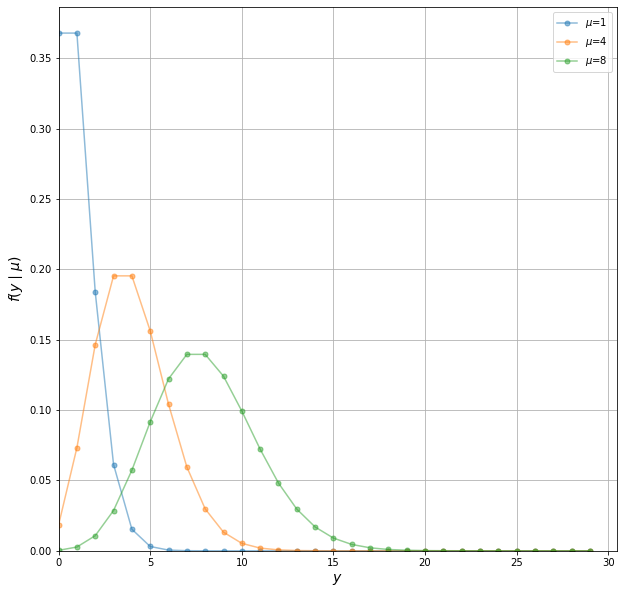

In [7]:
poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 30)

fig, ax = plt.subplots(figsize=(10,10))

for μ in [1, 4, 8]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=5)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=10)

plt.show()

In [8]:
dataset=pd.read_csv('nyc_bb_bicyclist_counts.csv')

In [9]:
dataset

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807
...,...,...,...,...,...
209,27-Oct-17,62.1,48.0,0.00,3150
210,28-Oct-17,68.0,55.9,0.00,2245
211,29-Oct-17,64.9,61.0,3.03,183
212,30-Oct-17,55.0,46.0,0.25,1428


In [30]:
for col in dataset:
    dataset[col].replace(np.nan, 0, inplace=True)
    print(dataset[col].unique())

['1-Apr-17' '2-Apr-17' '3-Apr-17' '4-Apr-17' '5-Apr-17' '6-Apr-17'
 '7-Apr-17' '8-Apr-17' '9-Apr-17' '10-Apr-17' '11-Apr-17' '12-Apr-17'
 '13-Apr-17' '14-Apr-17' '15-Apr-17' '16-Apr-17' '17-Apr-17' '18-Apr-17'
 '19-Apr-17' '20-Apr-17' '21-Apr-17' '22-Apr-17' '23-Apr-17' '24-Apr-17'
 '25-Apr-17' '26-Apr-17' '27-Apr-17' '28-Apr-17' '29-Apr-17' '30-Apr-17'
 '1-May-17' '2-May-17' '3-May-17' '4-May-17' '5-May-17' '6-May-17'
 '7-May-17' '8-May-17' '9-May-17' '10-May-17' '11-May-17' '12-May-17'
 '13-May-17' '14-May-17' '15-May-17' '16-May-17' '17-May-17' '18-May-17'
 '19-May-17' '20-May-17' '21-May-17' '22-May-17' '23-May-17' '24-May-17'
 '25-May-17' '26-May-17' '27-May-17' '28-May-17' '29-May-17' '30-May-17'
 '31-May-17' '1-Jun-17' '2-Jun-17' '3-Jun-17' '4-Jun-17' '5-Jun-17'
 '6-Jun-17' '7-Jun-17' '8-Jun-17' '9-Jun-17' '10-Jun-17' '11-Jun-17'
 '12-Jun-17' '13-Jun-17' '14-Jun-17' '15-Jun-17' '16-Jun-17' '17-Jun-17'
 '18-Jun-17' '19-Jun-17' '20-Jun-17' '21-Jun-17' '22-Jun-17' '23-Jun-17'
 '24-

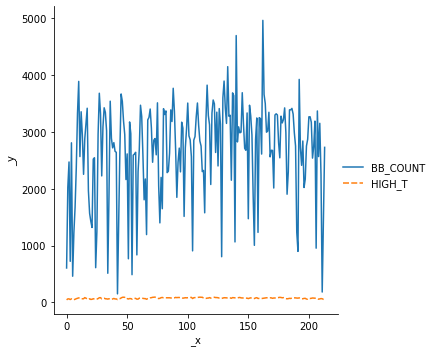

<Figure size 1080x576 with 0 Axes>

In [36]:
sns.relplot(data=dataset[['BB_COUNT', 'HIGH_T']], kind='line')
plt.figure(figsize=(15,8))
plt.show()

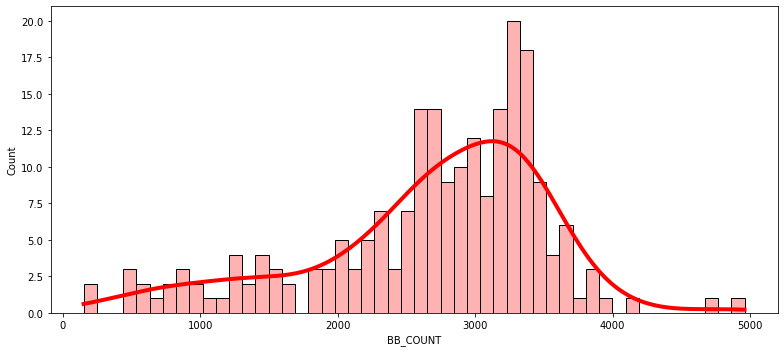

In [38]:
sns.histplot(dataset['BB_COUNT'], alpha=0.3, kde=True, bins=int(50), color = 'red',line_kws={'linewidth': 4})
plt.tight_layout()
plt.show();

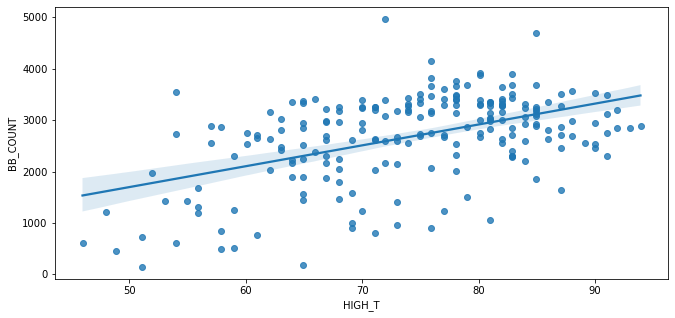

In [40]:
sns.regplot(x='HIGH_T', y='BB_COUNT', data = dataset)
plt.show()

In [43]:
features = api.add_constant(dataset.HIGH_T)
model = api.OLS(dataset.BB_COUNT, features).fit()
model.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BB_COUNT   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     68.45
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.44e-14
Time:                        23:37:08   Log-Likelihood:                -1717.9
No. Observations:                 214   AIC:                             3440.
Df Residuals:                     212   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -335.4862    368.017     -0.912      0.363   -1060.928     389.955
HIGH_T        40.6395      4.912      8.274      0.000      30.957      50.322
==============================================================================
Omnibus:                        7.004   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.778
Skew:                          -0.424   Prob(JB):                       0.0337
Kurtosis:                       3.206   Cond. No.                         542.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
res = model.resid
standard_dev = np.std(res)
standard_dev

741.3801031617978

## Maximum Likelihood II (50 points)

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

In [48]:
def MaximumLikelihoodEstimation(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*dataset.BB_COUNT

  LL = np.sum(stats.norm.logpdf(dataset.HIGH_T, pred, std_dev))
  MLEV = -1*LL
  return MLEV

In [49]:
MLE = minimize(MaximumLikelihoodEstimation, np.array([2,2,2]), method='L-BFGS-B')
MLE

      fun: 774.1610954211617
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.27373657e-05,  5.29780664e-03, -7.95807798e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 464
      nit: 80
     njev: 116
   status: 0
  success: True
        x: array([5.81058644e+01, 6.00587520e-03, 9.01270549e+00])

In [52]:
dataset_BB_COUNT = dataset.BB_COUNT
dataset_HIGH_T = dataset.HIGH_T
exog =dataset_BB_COUNT
endog = dataset_HIGH_T

In [53]:

print(sm.datasets.spector.NOTE)
print(dataset.HIGH_T.head())

::

    Number of Observations - 32

    Number of Variables - 4

    Variable name definitions::

        Grade - binary variable indicating whether or not a student's grade
                improved.  1 indicates an improvement.
        TUCE  - Test score on economics test
        PSI   - participation in program
        GPA   - Student's grade point average

0    46.0
1    62.1
2    63.0
3    51.1
4    63.0
Name: HIGH_T, dtype: float64


In [54]:
exog = sm.add_constant(exog, prepend=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
class MyProbit(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        q = 2 * endog - 1
        return stats.norm.logcdf(q*np.dot(exog, params)).sum()

In [56]:
sm_probit_manual = MyProbit(endog, exog).fit()
print(sm_probit_manual.summary())

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 7
         Function evaluations: 27
                               MyProbit Results                               
Dep. Variable:                 HIGH_T   Log-Likelihood:                 0.0000
Model:                       MyProbit   AIC:                             4.000
Method:            Maximum Likelihood   BIC:                             10.73
Date:                Tue, 11 Oct 2022                                         
Time:                        23:45:32                                         
No. Observations:                 214                                         
Df Residuals:                     212                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
